## CW Task 1

In [58]:
#pip install --upgrade gensim
#pip install python-Levenshtein
#pip install spacy && python -m spacy download en

#nltk.download("stopwords")

#pip install wordcloud

In [59]:
# https://www.kaggle.com/blessondensil294/topic-modeling-for-research-articles?select=train.csv

In [844]:
# Useful tutorial
#https://www.tutorialspoint.com/gensim/gensim_creating_lsi_and_hdp_topic_model.htm

In [2]:
import gensim
import pprint
import pandas
import csv
import numpy


from gensim.utils import simple_preprocess

import nltk

import spacy

from IPython.display import display

### Import Data, compile into one dataset

In [3]:
train = pandas.read_csv("Dataset/train.csv")
train = train[["ID", "TITLE", "ABSTRACT"]].replace("\\n", " ", regex = True)#.replace("\$", "", regex=True).replace("\\\\", "", regex=True)

test = pandas.read_csv("Dataset/test.csv").replace("\\n", " ", regex = True)#.replace("\$", "", regex=True).replace("\\\\", "", regex=True)

AllData = train.append(test, ignore_index = True)

AllData.to_csv("Dataset/Complete Dataset.csv")

In [4]:
AllData["ABSTRACT"][0]

"  Predictive models allow subject-specific inference when analyzing disease related alterations in neuroimaging data. Given a subject's data, inference can be made at two levels: global, i.e. identifiying condition presence for the subject, and local, i.e. detecting condition effect on each individual measurement extracted from the subject's data. While global inference is widely used, local inference, which can be used to form subject-specific effect maps, is rarely used because existing models often yield noisy detections composed of dispersed isolated islands. In this article, we propose a reconstruction method, named RSM, to improve subject-specific detections of predictive modeling approaches and in particular, binary classifiers. RSM specifically aims to reduce noise due to sampling error associated with using a finite sample of examples to train classifiers. The proposed method is a wrapper-type algorithm that can be used with different binary classifiers in a diagnostic manner

In [5]:
AllData.head(10)

,ID,TITLE,ABSTRACT
0,1,Reconstructing Subject-Specific Effect Maps,Predictive models allow subject-specific inf...
1,2,Rotation Invariance Neural Network,Rotation invariance and translation invarian...
2,3,Spherical polyharmonics and Poisson kernels fo...,We introduce and develop the notion of spher...
3,4,A finite element approximation for the stochas...,The stochastic Landau--Lifshitz--Gilbert (LL...
4,5,Comparative study of Discrete Wavelet Transfor...,Fourier-transform infra-red (FTIR) spectra o...
5,6,On maximizing the fundamental frequency of the...,Let $\Omega \subset \mathbb{R}^n$ be a bound...
6,7,On the rotation period and shape of the hyperb...,We observed the newly discovered hyperbolic ...
7,8,Adverse effects of polymer coating on heat tra...,The ability of metallic nanoparticles to sup...
8,9,SPH calculations of Mars-scale collisions: the...,We model large-scale ($\approx$2000km) impac...
9,10,$\mathcal{R}_{0}$ fails to predict the outbrea...,Time varying susceptibility of host at indiv...


### Clean data by removing low-information words

In [6]:
StopWords = nltk.corpus.stopwords.words("english")
StopWords.extend(["due", "show", "use", "datum", "problem", "paper", "approach", "present", "study", "new",
                 "also", "frac", "mathbb", "give", "bring", "find"])

In [7]:
def words_in_abstract(abstract):
    for word in abstract:
        word = gensim.utils.simple_preprocess(str(word), deacc=True)
        yield(word)

In [8]:
NewData = AllData["ABSTRACT"]
NewData_words = list(words_in_abstract(NewData))
print(NewData_words[:1])

[['predictive', 'models', 'allow', 'subject', 'specific', 'inference', 'when', 'analyzing', 'disease', 'related', 'alterations', 'in', 'neuroimaging', 'data', 'given', 'subject', 'data', 'inference', 'can', 'be', 'made', 'at', 'two', 'levels', 'global', 'identifiying', 'condition', 'presence', 'for', 'the', 'subject', 'and', 'local', 'detecting', 'condition', 'effect', 'on', 'each', 'individual', 'measurement', 'extracted', 'from', 'the', 'subject', 'data', 'while', 'global', 'inference', 'is', 'widely', 'used', 'local', 'inference', 'which', 'can', 'be', 'used', 'to', 'form', 'subject', 'specific', 'effect', 'maps', 'is', 'rarely', 'used', 'because', 'existing', 'models', 'often', 'yield', 'noisy', 'detections', 'composed', 'of', 'dispersed', 'isolated', 'islands', 'in', 'this', 'article', 'we', 'propose', 'reconstruction', 'method', 'named', 'rsm', 'to', 'improve', 'subject', 'specific', 'detections', 'of', 'predictive', 'modeling', 'approaches', 'and', 'in', 'particular', 'binary', 

In [9]:
# Build the Bigram and trigram models          

In [10]:
bigram = gensim.models.Phrases(NewData_words, min_count=3, threshold = 10)#, threshold=50) # higher threshold fewer phrases.
trigram = gensim.models.Phrases(bigram[NewData_words], threshold=10)  
bigram_mod = gensim.models.phrases.Phraser(bigram)
trigram_mod = gensim.models.phrases.Phraser(trigram)

In [11]:
def process_words(texts, stop_words=StopWords, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']):
    """Remove Stopwords, Form Bigrams, Trigrams and Lemmatization"""
    texts = [[word for word in simple_preprocess(str(doc)) if word not in StopWords] for doc in texts]
    texts = [bigram_mod[doc] for doc in texts]
    texts = [trigram_mod[bigram_mod[doc]] for doc in texts]
    texts_out = []
    nlp = spacy.load('en_core_web_sm', disable=['parser', 'ner'])
    for sent in texts:
        doc = nlp(" ".join(sent)) 
        texts_out.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])
    # remove stopwords once more after lemmatization
    texts_out = [[word for word in simple_preprocess(str(doc)) if word not in StopWords] for doc in texts_out]    
    return texts_out

In [12]:
data_ready = process_words(NewData_words)  # processed Text Data!

In [13]:
data_ready[0]

['allow',
 'inference',
 'analyze',
 'disease',
 'relate',
 'alteration',
 'subject',
 'inference',
 'make',
 'level',
 'global',
 'identifiye',
 'condition',
 'presence',
 'subject',
 'local',
 'detecting',
 'condition',
 'effect',
 'individual',
 'measurement',
 'extract',
 'subject',
 'global',
 'inference',
 'widely_use',
 'local',
 'inference',
 'form',
 'effect',
 'map',
 'rarely',
 'exist',
 'model',
 'often',
 'yield',
 'noisy',
 'detection',
 'compose',
 'disperse',
 'isolated',
 'island',
 'article',
 'propose',
 'reconstruction',
 'method',
 'name',
 'rsm',
 'improve',
 'detection',
 'particular',
 'rsm',
 'specifically',
 'aim',
 'reduce',
 'noise',
 'sample',
 'error',
 'associate',
 'finite_sample',
 'example',
 'train',
 'classifier',
 'proposed_method',
 'wrapper',
 'type',
 'algorithm',
 'different',
 'diagnostic',
 'information',
 'condition',
 'presence',
 'reconstruction',
 'pose',
 'prior',
 'model',
 'parameter',
 'estimate',
 'training_data',
 'classifier',
 'spe

In [14]:
# Create Dictionary of terms
id2word = gensim.corpora.Dictionary(data_ready)

In [15]:
# Create Corpus: Term Document Frequency
corpus = [id2word.doc2bow(text) for text in data_ready]

### Data examination

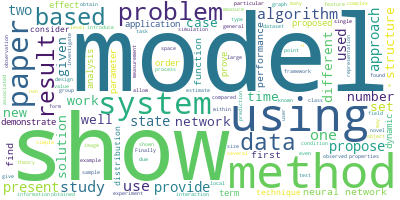

In [108]:
#Import the wordcloud library
from wordcloud import WordCloud
# Join the different processed titles together.
long_string = ','.join(list(AllData['ABSTRACT'].values))
# Create a WordCloud object
wordcloud = WordCloud(background_color="white", max_words=500, contour_width=5, contour_color='grey')
# Generate a word cloud
wordcloud.generate(long_string)
# Visualize the word cloud
wordcloud.to_image()

In [84]:
wordfreq = {}
for i in range(len(data_ready)):
    for w in data_ready[i]:
        if w not in wordfreq:
            wordfreq[w] = 0 
        wordfreq[w] += 1
        
wordfreq = dict(sorted(wordfreq.items(), key=lambda item: item[1], reverse=True))

In [85]:
wordfreq

{'model': 22749,
 'method': 13684,
 'result': 11497,
 'system': 11324,
 'base': 10972,
 'propose': 9914,
 'algorithm': 9415,
 'network': 7740,
 'provide': 7068,
 'set': 6299,
 'time': 6284,
 'state': 5978,
 'function': 5540,
 'structure': 5301,
 'number': 5184,
 'consider': 5093,
 'different': 4789,
 'learn': 4758,
 'demonstrate': 4684,
 'case': 4671,
 'obtain': 4648,
 'analysis': 4564,
 'performance': 4518,
 'parameter': 4441,
 'work': 4432,
 'however': 4236,
 'prove': 4174,
 'solution': 4136,
 'application': 4133,
 'distribution': 4117,
 'well': 4104,
 'large': 4093,
 'apply': 3989,
 'order': 3987,
 'process': 3984,
 'compare': 3961,
 'first': 3938,
 'property': 3929,
 'technique': 3900,
 'information': 3888,
 'introduce': 3846,
 'graph': 3799,
 'estimate': 3781,
 'design': 3741,
 'task': 3711,
 'sample': 3687,
 'develop': 3677,
 'include': 3658,
 'space': 3648,
 'feature': 3631,
 'theory': 3558,
 'dynamic': 3552,
 'framework': 3499,
 'term': 3434,
 'class': 3434,
 'image': 3410,
 'e

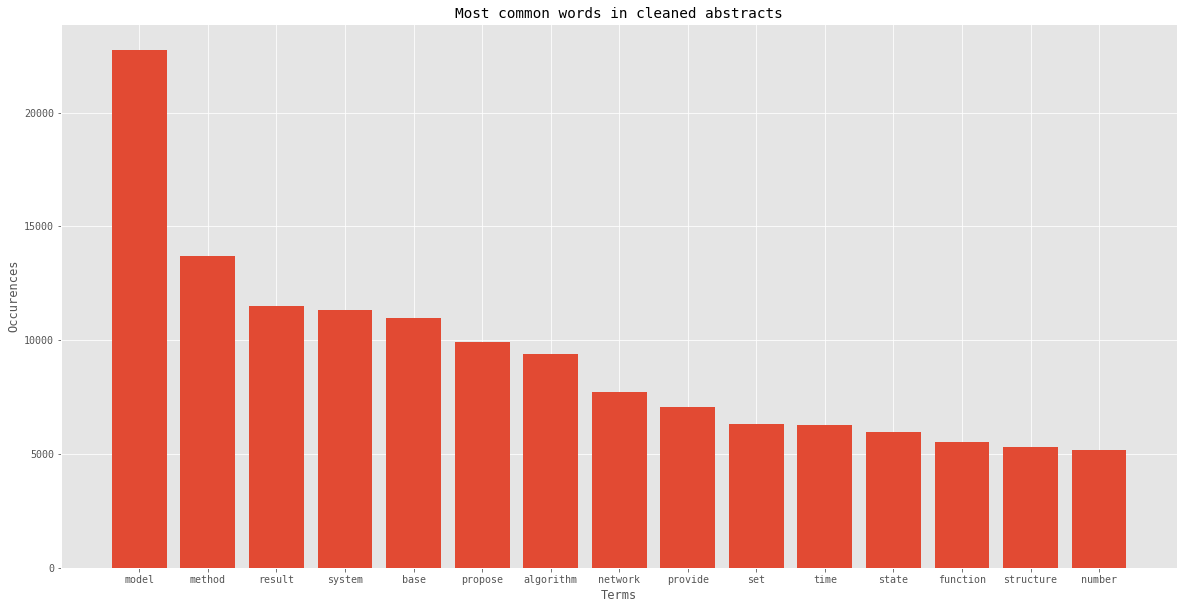

In [106]:
fig, ax = plt.subplots(figsize=(20,10))

tempfreq = {k: wordfreq[k] for k in list(wordfreq)[:15]}

#ax.bar(range(len(wordfreq)), list(wordfreq.values()));
ax.bar(range(15), list(tempfreq.values()));
ax.set_xticks(range(15));

ax.set_xticklabels(list(tempfreq.keys()), rotation='horizontal');
ax.set_title('Most common words in cleaned abstracts');
ax.set_xlabel('Terms');
ax.set_ylabel('Occurences');
plt.show()

In [113]:
len(wordfreq)

60077

In [115]:
sum(wordfreq.values())

1992576

#### How Many Topics???

In [14]:
# HOW MANY SECTIONS????
num_topics = 6

In [15]:
# Build LDA model
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=num_topics, 
                                           random_state=1,
                                           update_every=1,
                                           chunksize=200,
                                           passes=10,
                                           alpha='symmetric',
                                           iterations=100,
                                           per_word_topics=True)

In [16]:
print(pandas.DataFrame(lda_model.print_topics())[1][0])

0.012*"system" + 0.007*"effect" + 0.007*"energy" + 0.006*"phase" + 0.006*"state" + 0.006*"field" + 0.005*"interaction" + 0.005*"surface" + 0.005*"observe" + 0.005*"result"


In [17]:
def get_lda_topics(model, num_topics):
    word_dict = {};
    for i in range(num_topics):
        words = model.show_topic(i, topn = 20);
        word_dict['Topic # ' + '{:2d}'.format(i+1)] = [i[0] for i in words];
    return pandas.DataFrame(word_dict);

In [18]:
get_lda_topics(lda_model, num_topics)

,Topic # 1,Topic # 2,Topic # 3,Topic # 4,Topic # 5,Topic # 6
0,system,system,learn,prove,mode,model
1,effect,network,model,function,mass,method
2,energy,user,method,result,observation,algorithm
3,phase,design,task,set,delta,base
4,state,information,propose,space,planet,result
5,field,control,dataset,theory,disk,propose
6,interaction,environment,feature,case,beam,provide
7,surface,research,image,solution,survey,time
8,observe,agent,network,group,detection,analysis
9,result,base,base,graph,sim,distribution


In [19]:
def format_topics_sentences(ldamodel=None, corpus=corpus, texts=NewData):
    
    temp = pandas.DataFrame()

    for i, row_list in enumerate(ldamodel[corpus]):
        row = row_list[0] if ldamodel.per_word_topics else row_list            
        row = sorted(row, key=lambda x: (x[1]), reverse=True)
        
        # Get the Dominant topic, Perc Contribution and Keywords for each document
        for j, (topic_num, prop_topic) in enumerate(row):
            if j == 0:  
                wp = ldamodel.show_topic(topic_num)
                topic_keywords = ", ".join([word for word, prop in wp])
                temp = temp.append(pandas.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
            else:
                break
    temp.columns = ['Dominant_Topic', 'Perc_Contribution', 'Topic_Keywords']

    contents = pandas.Series(NewData)
    sent_topics_df1 = pandas.concat([temp, contents], axis=1)
    return(temp)


In [20]:
df_topic_sents_keywords = format_topics_sentences(ldamodel=lda_model, corpus=corpus, texts=data_ready)

In [21]:
contents = pandas.Series(NewData)
df_topic_sents_keywords = pandas.concat([df_topic_sents_keywords, contents], axis=1)

In [22]:
pandas.set_option('display.max_colwidth', None)
df_topic_sents_keywords.head(30)

,Dominant_Topic,Perc_Contribution,Topic_Keywords,ABSTRACT
0,5.0,0.5060,"model, method, algorithm, base, result, propose, provide, time, analysis, distribution","Predictive models allow subject-specific inference when analyzing disease related alterations in neuroimaging data. Given a subject's data, inference can be made at two levels: global, i.e. identifiying condition presence for the subject, and local, i.e. detecting condition effect on each individual measurement extracted from the subject's data. While global inference is widely used, local inference, which can be used to form subject-specific effect maps, is rarely used because existing models often yield noisy detections composed of dispersed isolated islands. In this article, we propose a reconstruction method, named RSM, to improve subject-specific detections of predictive modeling approaches and in particular, binary classifiers. RSM specifically aims to reduce noise due to sampling error associated with using a finite sample of examples to train classifiers. The proposed method is a wrapper-type algorithm that can be used with different binary classifiers in a diagnostic manner, i.e. without information on condition presence. Reconstruction is posed as a Maximum-A-Posteriori problem with a prior model whose parameters are estimated from training data in a classifier-specific fashion. Experimental evaluation is performed on synthetically generated data and data from the Alzheimer's Disease Neuroimaging Initiative (ADNI) database. Results on synthetic data demonstrate that using RSM yields higher detection accuracy compared to using models directly or with bootstrap averaging. Analyses on the ADNI dataset show that RSM can also improve correlation between subject-specific detections in cortical thickness data and non-imaging markers of Alzheimer's Disease (AD), such as the Mini Mental State Examination Score and Cerebrospinal Fluid amyloid-$\beta$ levels. Further reliability studies on the longitudinal ADNI dataset show improvement on detection reliability when RSM is used."
1,2.0,0.4991,"learn, model, method, task, propose, dataset, feature, image, network, base","Rotation invariance and translation invariance have great values in image recognition tasks. In this paper, we bring a new architecture in convolutional neural network (CNN) named cyclic convolutional layer to achieve rotation invariance in 2-D symbol recognition. We can also get the position and orientation of the 2-D symbol by the network to achieve detection purpose for multiple non-overlap target. Last but not least, this architecture can achieve one-shot learning in some cases using those invariance."
2,3.0,0.4678,"prove, function, result, set, space, theory, case, solution, group, graph","We introduce and develop the notion of spherical polyharmonics, which are a natural generalisation of spherical harmonics. In particular we study the theory of zonal polyharmonics, which allows us, analogously to zonal harmonics, to construct Poisson kernels for polyharmonic functions on the union of rotated balls. We find the representation of Poisson kernels and zonal polyharmonics in terms of the Gegenbauer polynomials. We show the connection between the classical Poisson kernel for harmonic functions on the ball, Poisson kernels for polyharmonic functions on the union of rotated balls, and the Cauchy-Hua kernel for holomorphic functions on the Lie ball."
3,3.0,0.5095,"prove, function, result, set, space, theory, case, solution, group, graph","The stochastic Landau--Lifshitz--Gilbert (LLG) equation coupled with the Maxwell equations (the so called stochastic MLLG system) describes the creation of domain walls and vortices (fundamental objects for the novel nanostructured magnetic memories). We first reformulate the stochastic LLG equation into an equation with time-differentiable solutions. We then propose a convergent $\theta$-linear scheme to approximate the solutions of the reformulated system. As a consequen

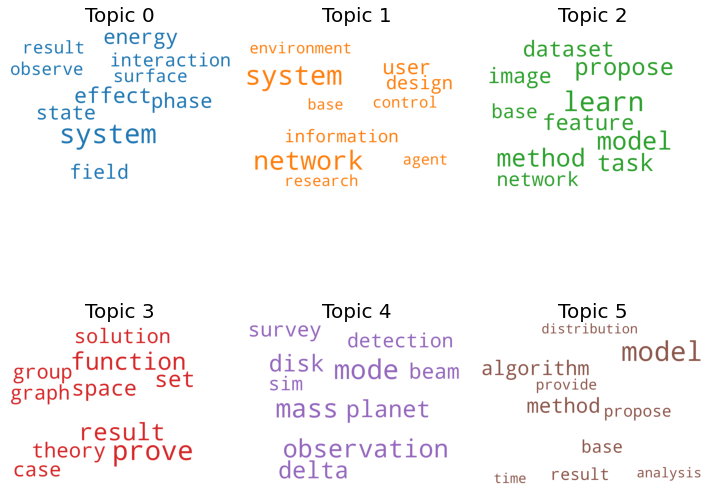

In [23]:
from matplotlib import pyplot as plt
from wordcloud import WordCloud
import matplotlib.colors as mcolors

cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]  # more colors: 'mcolors.XKCD_COLORS'

cloud = WordCloud(stopwords=StopWords,
                  background_color='white',
                  width=2500,
                  height=1800,
                  max_words=10,
                  colormap='tab10',
                  color_func=lambda *args, **kwargs: cols[i],
                  prefer_horizontal=1.0)

topics = lda_model.show_topics(formatted=False)

fig, axes = plt.subplots(2, 3, figsize=(10,10), sharex=True, sharey=True)

for i, ax in enumerate(axes.flatten()):
    fig.add_subplot(ax)
    topic_words = dict(topics[i][1])
    cloud.generate_from_frequencies(topic_words, max_font_size=300)
    plt.gca().imshow(cloud)
    plt.gca().set_title('Topic ' + str(i), fontdict=dict(size=20))
    plt.gca().axis('off')


plt.subplots_adjust(wspace=0, hspace=0)
plt.axis('off')
plt.margins(x=0, y=0)
plt.tight_layout()
plt.show()

In [24]:
# Get topic weights and dominant topics ------------
from sklearn.manifold import TSNE
from bokeh.plotting import figure, output_file, show
from bokeh.models import Label, Legend, ColumnDataSource
from bokeh.io import output_notebook


# Get topic weights
topic_weights = []
for i, row_list in enumerate(lda_model[corpus]):
    topic_weights.append([w for i, w in row_list[0]])

# Array of topic weights    
arr = pandas.DataFrame(topic_weights).fillna(0).values

# Keep the well separated points (optional)
arr = arr[numpy.amax(arr, axis=1) > 0.35]

# Dominant topic number in each doc
topic_num = numpy.argmax(arr, axis=1)

# tSNE Dimension Reduction
tsne_model = TSNE(n_components=2, verbose=1, random_state=0, angle=.99, init='pca')
tsne_lda = tsne_model.fit_transform(arr)


mycolors = numpy.array([color for name, color in mcolors.TABLEAU_COLORS.items()])

tsne_lda = numpy.insert(tsne_lda, 2, topic_num, axis = 1)
tsne_lda = numpy.insert(tsne_lda, 3, topic_num, axis = 1)

temp = pandas.DataFrame(tsne_lda)
temp.columns = ["X", "Y", "Top_Num", "Colour"]

temp.loc[temp["Top_Num"] == 0, "Colour"] = '#1f77b4'
temp.loc[temp["Top_Num"] == 1, "Colour"] = '#ff7f0e'
temp.loc[temp["Top_Num"] == 2, "Colour"] = '#2ca02c'
temp.loc[temp["Top_Num"] == 3, "Colour"] = '#d62728'
temp.loc[temp["Top_Num"] == 4, "Colour"] = '#9467bd'
temp.loc[temp["Top_Num"] == 5, "Colour"] = '#8c564b'

# Plot the Topic Clusters using Bokeh
output_notebook()
n_topics = num_topics
#mycolors = numpy.array([color for name, color in mcolors.TABLEAU_COLORS.items()])
plot = figure(title="t-SNE Clustering of {} LDA Topics".format(n_topics), 
              plot_width=900, plot_height=700)




src = ColumnDataSource(temp)


#plot.scatter(x=temp["X"], y=temp["Y"], legend_field = "Top_Num", line_color = None, fill_color = mycolors[topic_num])
plot.scatter(x="X", y="Y", line_color = "Top_Num", legend_field = "Top_Num", fill_color = "Colour", source = src)
#plot.scatter(x=tsne_lda[:,0], y=tsne_lda[:,1], color=mycolors[topic_num])

#hover = plot_lda.select(dict(type=HoverTool))
#hover.tooltips = {"content": "Title: @title, KeyWords: @content - Topic: @topic_key "}
plot.legend.location = "top_left"

show(plot)

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 28317 samples in 0.037s...
[t-SNE] Computed neighbors for 28317 samples in 0.794s...
[t-SNE] Computed conditional probabilities for sample 1000 / 28317
[t-SNE] Computed conditional probabilities for sample 2000 / 28317
[t-SNE] Computed conditional probabilities for sample 3000 / 28317
[t-SNE] Computed conditional probabilities for sample 4000 / 28317
[t-SNE] Computed conditional probabilities for sample 5000 / 28317
[t-SNE] Computed conditional probabilities for sample 6000 / 28317
[t-SNE] Computed conditional probabilities for sample 7000 / 28317
[t-SNE] Computed conditional probabilities for sample 8000 / 28317
[t-SNE] Computed conditional probabilities for sample 9000 / 28317
[t-SNE] Computed conditional probabilities for sample 10000 / 28317
[t-SNE] Computed conditional probabilities for sample 11000 / 28317
[t-SNE] Computed conditional probabilities for sample 12000 / 28317
[t-SNE] Computed conditional probabilities for sam

Loading BokehJS ...

### LSA - Very Poor, not used in report, skip to NMF below

In [30]:
from sklearn.feature_extraction.text import CountVectorizer

from matplotlib import pyplot as plt
from wordcloud import WordCloud
import matplotlib.colors as mcolors

In [27]:
small_count_vectorizer = CountVectorizer(stop_words=StopWords, max_features=4000000)
#small_text_sample = AllData["ABSTRACT"].sample(n=1000, random_state=0).values


small_document_term_matrix = small_count_vectorizer.fit_transform(AllData["ABSTRACT"])

In [28]:
small_document_term_matrix

<29961x66187 sparse matrix of type '<class 'numpy.int64'>'
	with 2033076 stored elements in Compressed Sparse Row format>

#### Word Cloud by topic doesn't work because of negative weights

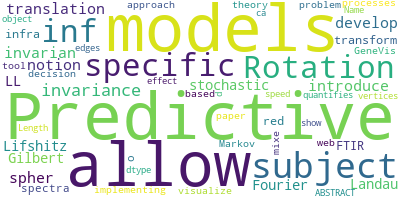

In [31]:
# Create a WordCloud object
wordcloud = WordCloud(background_color="white", max_words=5000, contour_width=5, contour_color='grey')
# Generate a word cloud
wordcloud.generate(str(AllData['ABSTRACT']))
# Visualize the word cloud
wordcloud.to_image()

In [120]:
StopWords = nltk.corpus.stopwords.words("english")
StopWords.extend(["due", "show", "use", "datum", "problem", "paper", "approach", "present", "study", "new",
                 "also", "frac", "mathbb", "give", "bring", "find", "data", "model", "method", "system", "base"])

In [132]:
num_topics = 12

In [133]:
#small_count_vectorizer = CountVectorizer(stop_words='english', max_features=40000)
small_count_vectorizer = CountVectorizer(stop_words=StopWords, max_features=40000)
small_text_sample = AllData["ABSTRACT"]



small_document_term_matrix = small_count_vectorizer.fit_transform(small_text_sample)

In [134]:
lsa_model = TruncatedSVD(n_components=num_topics)
lsa_topic_matrix = lsa_model.fit_transform(small_document_term_matrix)

In [135]:
def get_keys(topic_matrix):
    '''
    returns an integer list of predicted topic 
    categories for a given topic matrix
    '''
    keys = topic_matrix.argmax(axis=1).tolist()
    return keys

def keys_to_counts(keys):
    '''
    returns a tuple of topic categories and their 
    accompanying magnitudes for a given list of keys
    '''
    count_pairs = Counter(keys).items()
    categories = [pair[0] for pair in count_pairs]
    counts = [pair[1] for pair in count_pairs]
    return (categories, counts)


In [136]:
from collections import Counter

lsa_keys = get_keys(lsa_topic_matrix)
lsa_categories, lsa_counts = keys_to_counts(lsa_keys)

In [137]:
# Define helper functions
def get_top_n_words(n, keys, document_term_matrix, count_vectorizer):
    '''
    returns a list of n_topic strings, where each string contains the n most common 
    words in a predicted category, in order
    '''
    top_word_indices = []
    for topic in range(num_topics):
        temp_vector_sum = 0
        for i in range(len(keys)):
            if keys[i] == topic:
                temp_vector_sum += document_term_matrix[i]
        temp_vector_sum = temp_vector_sum.toarray()
        top_n_word_indices = numpy.flip(numpy.argsort(temp_vector_sum)[0][-n:],0)
        top_word_indices.append(top_n_word_indices)   
    top_words = []
    for topic in top_word_indices:
        topic_words = []
        for index in topic:
            temp_word_vector = numpy.zeros((1,document_term_matrix.shape[1]))
            temp_word_vector[:,index] = 1
            the_word = count_vectorizer.inverse_transform(temp_word_vector)[0][0]
            topic_words.append(the_word.encode('ascii').decode('utf-8'))
        top_words.append(" ".join(topic_words))         
    return top_words

In [138]:
top_n_words_lsa = get_top_n_words(10, lsa_keys, small_document_term_matrix, small_count_vectorizer)

for i in range(len(top_n_words_lsa)):
    print("Topic {}: ".format(i+1), top_n_words_lsa[i])

Topic 1:  based using results two time learning network one models proposed
Topic 2:  learning deep neural network networks training tasks task performance models
Topic 3:  algorithm time log algorithms polynomial convex problems graph set case
Topic 4:  learning machine reinforcement models tasks methods task based agent transfer
Topic 5:  time based real series using traffic used proposed high control
Topic 6:  time quantum field state spin phase magnetic space dynamics states
Topic 7:  mass galaxies star models stellar 10 gas galaxy formation rm
Topic 8:  models systems two based theory topological process one different several
Topic 9:  models spin magnetic phase field temperature transition algorithm state order
Topic 10:  graph graphs number vertices two algorithm edge set vertex edges
Topic 11:  systems control information energy social users quantum power design research
Topic 12:  mathcal group let prove based field space algebra left right


In [139]:
tsne_lsa_model = TSNE(n_components=2, perplexity=50, learning_rate=100, 
                        n_iter=2000, verbose=1, random_state=0, angle=0.75)
tsne_lsa_vectors = tsne_lsa_model.fit_transform(lsa_topic_matrix)

[t-SNE] Computing 151 nearest neighbors...
[t-SNE] Indexed 29961 samples in 0.065s...
[t-SNE] Computed neighbors for 29961 samples in 10.025s...
[t-SNE] Computed conditional probabilities for sample 1000 / 29961
[t-SNE] Computed conditional probabilities for sample 2000 / 29961
[t-SNE] Computed conditional probabilities for sample 3000 / 29961
[t-SNE] Computed conditional probabilities for sample 4000 / 29961
[t-SNE] Computed conditional probabilities for sample 5000 / 29961
[t-SNE] Computed conditional probabilities for sample 6000 / 29961
[t-SNE] Computed conditional probabilities for sample 7000 / 29961
[t-SNE] Computed conditional probabilities for sample 8000 / 29961
[t-SNE] Computed conditional probabilities for sample 9000 / 29961
[t-SNE] Computed conditional probabilities for sample 10000 / 29961
[t-SNE] Computed conditional probabilities for sample 11000 / 29961
[t-SNE] Computed conditional probabilities for sample 12000 / 29961
[t-SNE] Computed conditional probabilities for s

In [143]:
# Define helper functions
def get_mean_topic_vectors(keys, two_dim_vectors):
    '''
    returns a list of centroid vectors from each predicted topic category
    '''
    mean_topic_vectors = []
    for t in range(num_topics):
        articles_in_that_topic = []
        for i in range(len(keys)):
            if keys[i] == t:
                articles_in_that_topic.append(two_dim_vectors[i])    
        
        articles_in_that_topic = numpy.vstack(articles_in_that_topic)
        mean_article_in_that_topic = numpy.mean(articles_in_that_topic, axis=0)
        mean_topic_vectors.append(mean_article_in_that_topic)
    return mean_topic_vectors

In [144]:
colormap = numpy.array(["#1f77b4", "#ff7f0e", "#2ca02c", "#d62728", "#9467bd", "#8c564b"])
colormap = colormap[:num_topics]

In [150]:
colormap = numpy.array([
    "#1f77b4", "#aec7e8", "#ff7f0e", "#ffbb78", "#2ca02c",
    "#98df8a", "#d62728", "#ff9896", "#9467bd", "#c5b0d5",
    "#8c564b", "#c49c94", "#e377c2", "#f7b6d2", "#7f7f7f",
    "#c7c7c7", "#bcbd22", "#dbdb8d", "#17becf", "#9edae5" ])
colormap = colormap[:num_topics]

In [151]:
top_3_words_lsa = get_top_n_words(3, lsa_keys, small_document_term_matrix, small_count_vectorizer)
lsa_mean_topic_vectors = get_mean_topic_vectors(lsa_keys, tsne_lsa_vectors)

plot = figure(title="t-SNE Clustering of {} LSA Topics".format(num_topics), plot_width=700, plot_height=700)
plot.scatter(x=tsne_lsa_vectors[:,0], y=tsne_lsa_vectors[:,1], color=colormap[lsa_keys])

for t in range(n_topics):
    label = Label(x=lsa_mean_topic_vectors[t][0], y=lsa_mean_topic_vectors[t][1], 
                  text=top_3_words_lsa[t], text_color=colormap[t])
    plot.add_layout(label)
    
show(plot)

In [69]:
NMF_Temp = pd.DataFrame(columns = ["Test1"])
for i in range(len(data_ready)):
    NMF_Temp.loc[i] = " ".join(list(data_ready[i]))

### NMF

In [79]:
import pandas as pd
import numpy as np
from sklearn.manifold import TSNE
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import NMF
import random 
random.seed(13)

#visualization packages
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import matplotlib
%matplotlib inline
import seaborn as sns

In [80]:
num_topics = 6

In [102]:
n_features = 1000
n_top_words = 10


def print_top_words(model, feature_names, n_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print("\nTopic #%d:" % topic_idx)
        print(" ".join([feature_names[i]
                        for i in topic.argsort()[:-n_top_words - 1:-1]]))
    print()


tfidf_vectorizer = TfidfVectorizer(max_df=0.95, min_df=2, max_features=n_features, stop_words='english')

tfidf = tfidf_vectorizer.fit_transform(AllData["ABSTRACT"])

nmf = NMF(n_components=num_topics, random_state=0,alpha=.1, l1_ratio=.5).fit(tfidf)



#Create topic wordlist (Lemmatised terms)
tfidf_vectorizer_wordlist = TfidfVectorizer(max_df=0.95, min_df=2, max_features=n_features, stop_words=StopWords)

tfidf_wordlist = tfidf_vectorizer_wordlist.fit_transform(NMF_Temp["Test1"])


nmf_wordlist = NMF(n_components=num_topics, random_state=0,alpha=.1, l1_ratio=.5).fit(tfidf_wordlist)

print("Topics found via NMF:")
tfidf_feature_names = tfidf_vectorizer_wordlist.get_feature_names()
print_top_words(nmf_wordlist, tfidf_feature_names, n_top_words)

D:\Users\James\anaconda3\lib\site-packages\sklearn\decomposition\_nmf.py:315: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  "'nndsvda' in 1.1 (renaming of 0.26)."), FutureWarning)
D:\Users\James\anaconda3\lib\site-packages\sklearn\decomposition\_nmf.py:315: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  "'nndsvda' in 1.1 (renaming of 0.26)."), FutureWarning)


Topics found via NMF:

Topic #0:
method algorithm propose base learn performance task image dataset feature

Topic #1:
prove function group space solution result set theory equation class

Topic #2:
graph vertex edge algorithm node number structure tree cycle path

Topic #3:
model parameter prediction propose distribution dynamic inference process predict base

Topic #4:
network node structure layer information dynamic link community neural_network train

Topic #5:
system effect state phase energy interaction dynamic observe field high



In [103]:
nmf_embedding = nmf.transform(tfidf)

In [104]:
top_idx = np.argsort(nmf_embedding,axis=0)[-3:]

count = 0
for idxs in top_idx.T: 
    print("\nTopic {}:".format(count))
    for idx in idxs:
        print(AllData.iloc[idx]['ABSTRACT'])
    count += 1


Topic 0:
  In this paper, we are motivated by two important applications: entropy-regularized optimal transport problem and road or IP traffic demand matrix estimation by entropy model. Both of them include solving a special type of optimization problem with linear equality constraints and objective given as a sum of an entropy regularizer and a linear function. It is known that the state-of-the-art solvers for this problem, which are based on Sinkhorn's method (also known as RSA or balancing method), can fail to work, when the entropy-regularization parameter is small. We consider the above optimization problem as a particular instance of a general strongly convex optimization problem with linear constraints. We propose a new algorithm to solve this general class of problems. Our approach is based on the transition to the dual problem. First, we introduce a new accelerated gradient method with adaptive choice of gradient's Lipschitz constant. Then, we apply this method to the dual pr

In [105]:
tsne = TSNE(random_state=3211)
#tsne = TSNE(random_state=6)

tsne_embedding = tsne.fit_transform(nmf_embedding)
tsne_embedding = pd.DataFrame(tsne_embedding,columns=['x','y'])
tsne_embedding['hue'] = nmf_embedding.argmax(axis=1)

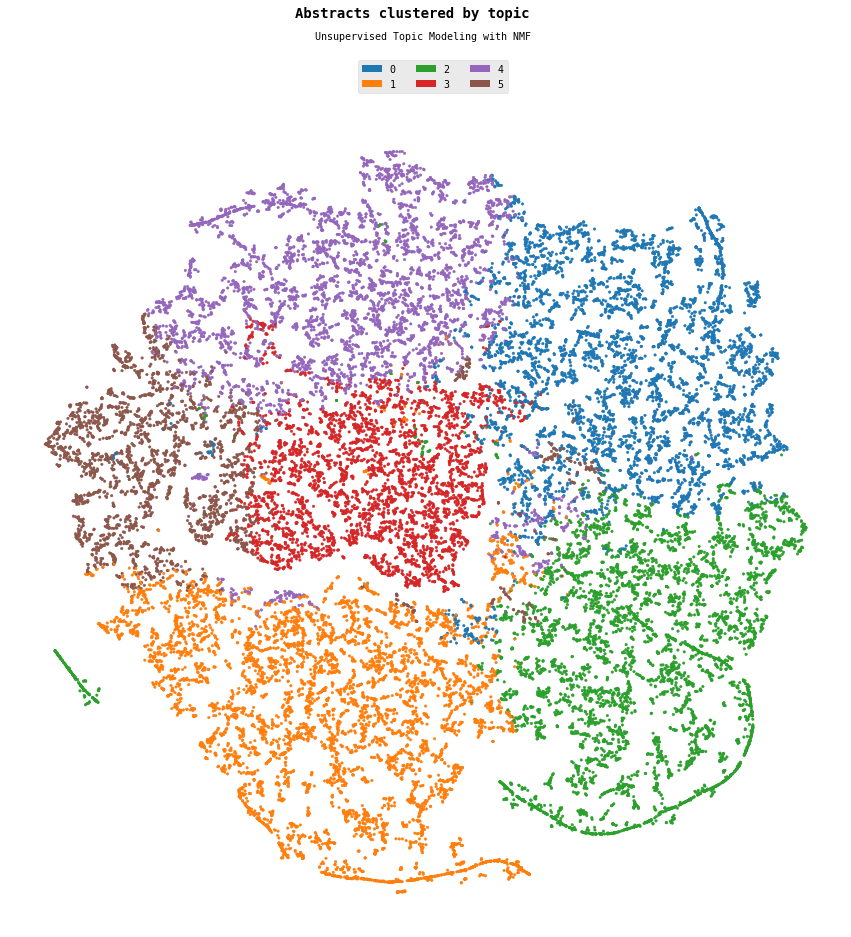

In [106]:
matplotlib.rc('font',family='monospace')
plt.style.use('ggplot')


topics = ['0', '1', '2', '3', '4', '5']

legend_list = []

colors = np.array(['#1f77b4', '#ff7f0e', '#2ca02c',
                   '#d62728', '#9467bd', '#8c564b'])

#def hex_to_rgb(value):
#    value = value.lstrip('#')
#    lv = len(value)
#    return tuple(int(value[i:i + lv // 3], 16)/255 for i in range(0, lv, lv // 3))
#colors = np.array([hex_to_rgb('#1f77b4'), hex_to_rgb('#ff7f0e'), hex_to_rgb('#2ca02c'),
#                   hex_to_rgb('#d62728'), hex_to_rgb('#9467bd'), hex_to_rgb('#8c564b')])


for i in range(len(topics)):   
    color = colors[i]
    legend_list.append(mpatches.Ellipse((0, 0), 1, 1, fc=color))


    
fig, axs = plt.subplots(1,1, figsize=(15, 15), facecolor='w', edgecolor='k')
fig.subplots_adjust(hspace = .1, wspace=0)


data = tsne_embedding

data.loc[data["hue"] == 0, "Colour"] = '#1f77b4'
data.loc[data["hue"] == 1, "Colour"] = '#ff7f0e'
data.loc[data["hue"] == 2, "Colour"] = '#2ca02c'
data.loc[data["hue"] == 3, "Colour"] = '#d62728'
data.loc[data["hue"] == 4, "Colour"] = '#9467bd'
data.loc[data["hue"] == 5, "Colour"] = '#8c564b'

scatter = axs.scatter(data=data, x='x', y='y', s=6, c=data['Colour'], cmap="Set1")
axs.set_title('',**{'fontsize':'10'})
axs.axis('off')



plt.suptitle("Abstracts clustered by topic",**{'fontsize':'14','weight':'bold'})
plt.figtext(.51,0.95,'Unsupervised Topic Modeling with NMF', **{'fontsize':'10','weight':'light'}, ha='center')


fig.legend(legend_list, list(range(num_topics)), loc=(0.42, 0.9),ncol=3)
#plt.subplots_adjust(top=0.85)

plt.show()